#Cross Validation Techniques :-
#KFold,
# RepeatedKFold,
# LeaveOneOut,
# LeavePOut,
# StratifiedKFold

In [48]:
import pandas as pd
import numpy as np
from scipy.special import comb
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import (
    KFold,
    RepeatedKFold,
    LeaveOneOut,
    LeavePOut,
    StratifiedKFold,
    cross_validate,
    GridSearchCV,
    train_test_split,
)

In [5]:
breast_cancer_X, breast_cancer_y = load_breast_cancer(return_X_y=True)
X = pd.DataFrame(breast_cancer_X)
y = pd.Series(breast_cancer_y).map({0:1, 1:0})
X.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)

X_train.shape, X_test.shape

((398, 30), (171, 30))

In [16]:
def initialize_estimate_objects():
  # K-Fold Cross-Validation
  kf = KFold(n_splits=5, shuffle=True, random_state=4)
  # Repeated K-Fold Cross-Validation
  rkf = RepeatedKFold(n_splits=5,n_repeats=10,random_state=4)
  # Leave One Out Cross-Validation
  loo = LeaveOneOut()
  # Leave P Out Cross-Validation
  lpo = LeavePOut(p=2)
  # Leave P Out Cross-Validation
  skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=4)
  return kf,rkf,loo,lpo,skf



In [18]:
def initialize_model():
  logit = LogisticRegression(penalty ='l2', C=10, solver='liblinear', random_state=4, max_iter=10000)
  return logit 

In [41]:
def run_cross_validate(strategy,start_nm,logit):
  clf =  cross_validate(
      logit,
      X_train, 
      y_train,
      scoring='accuracy',
      return_train_score=True,
      cv=strategy)
  return clf

# Validation based on various validation schemes

In [45]:
def mn():
  kf,rkf,loo,lpo,skf=initialize_estimate_objects()
  logit=initialize_model()
  lst_strat=[(kf, 'K-Fold'), (rkf, 'Repeated-Kfold'), (loo, 'Leave-One-Out'), (skf, 'Startified-K-Fold')]#,(lpo, 'Leave-P-Out'), (skf, 'Startified-K-Fold')]
  for x in lst_strat:
     clf=run_cross_validate(x[0],x[1],logit)
     #print(x[0],x[1])
     print('mean train set accuracy for  ',x[1],":", np.mean(clf['train_score']), ' +- ', np.std(clf['train_score']))
     print('mean test set accuracy: ',x[1],":" ,np.mean(clf['test_score']), ' +- ', np.std(clf['test_score']))

In [46]:
mn()

mean train set accuracy for   K-Fold : 0.9685948620886812  +-  0.004426551735731128
mean test set accuracy:  K-Fold : 0.9497784810126582  +-  0.013608919570498668
mean train set accuracy for   Repeated-Kfold : 0.9674625894599871  +-  0.007013818671387587
mean test set accuracy:  Repeated-Kfold : 0.9517594936708862  +-  0.024030609586188214
mean train set accuracy for   Leave-One-Out : 0.9653494171107427  +-  0.0033102428991293093
mean test set accuracy:  Leave-One-Out : 0.957286432160804  +-  0.2022105807361286
mean train set accuracy for   Startified-K-Fold : 0.9698487805839792  +-  0.005106516919517037
mean test set accuracy:  Startified-K-Fold : 0.9496518987341773  +-  0.02131474180547955


# # Validation based on various validation schemes along with Grid Search

In [65]:
def main_search():
  kf,rkf,loo,lpo,skf=initialize_estimate_objects()
  logit=initialize_model()
  # hyperparameter space
  param_grid = dict(
      penalty=['l1', 'l2'],
      C=[0.1, 1, 10],
  )
  lst_strat=[(kf, 'K-Fold'), (rkf, 'Repeated-Kfold')]#, (loo, 'Leave-One-Out')]#, (skf, 'Startified-K-Fold')]#,(lpo, 'Leave-P-Out'), (skf, 'Startified-K-Fold')]
  for x in lst_strat:
     print(x[0])
     clf = GridSearchCV(
                    logit,
                    param_grid,
                    scoring='accuracy',
                    cv=x[0], # repeated k-fold
                    refit=True) # refits best model to entire dataset)
     search = clf.fit(X_train, y_train)
    # print("best hyperparameters when using : ",x[1])
     print(search.best_params_)
     results = pd.DataFrame(search.cv_results_)[['params', 'mean_test_score', 'std_test_score']]
     results.sort_values(by='mean_test_score', ascending=False, inplace=True)
     results.reset_index(drop=True, inplace=True)
     results['mean_test_score'].plot(yerr=[results['std_test_score'], results['std_test_score']], subplots=True)
     plt.ylabel('Mean Accuracy')
     plt.xlabel('Hyperparameter space')
     train_preds = search.predict(X_train)
     test_preds = search.predict(X_test)
     print('Train Accuracy: ', accuracy_score(y_train, train_preds))
     print('Test Accuracy: ', accuracy_score(y_test, test_preds))



KFold(n_splits=5, random_state=4, shuffle=True)
{'C': 10, 'penalty': 'l2'}
Train Accuracy:  0.9623115577889447
Test Accuracy:  0.9532163742690059
RepeatedKFold(n_repeats=10, n_splits=5, random_state=4)
{'C': 10, 'penalty': 'l1'}
Train Accuracy:  0.9748743718592965
Test Accuracy:  0.9707602339181286


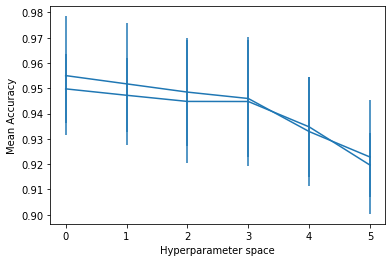

In [66]:
main_search()